In [2]:
import sys
from pathlib import Path
import importlib

project_root = Path.cwd().parent
sys.path.append(str(project_root / "src"))

import task1
importlib.reload(task1)
from task1 import *

## Task1

In [ ]:
import pandas as pd

df = load_dataset()
df_clean = exclude_shoppers(df)
# ---- Livelli merchandising ----
levels = {
    "liv1": "descr_liv1",
    "liv2": "descr_liv2",
    "liv3": "descr_liv3",
    "liv4": "descr_liv4"
}
# ---- Plotting ----
for level, desc_col in levels.items():
    plot_frequency(df_clean, desc_col, f"Level {level.upper()}")

## Task2

In [4]:
# Converti la colonna 'data' in datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")


C:\Users\giova\AppData\Local\Temp\ipykernel_18672\3162037802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")


In [5]:
# Range 1: 01 Gennaio → 15 Maggio
mask1 = (df_clean['data'].dt.month < 5) | ((df_clean['data'].dt.month == 5) & (df_clean['data'].dt.day <= 15))

# Range 2: 16 Maggio → 30 Settembre
mask2 = ((df_clean['data'].dt.month == 5) & (df_clean['data'].dt.day > 15)) | \
        ((df_clean['data'].dt.month >= 6) & (df_clean['data'].dt.month <= 9))

# Range 3: 01 Ottobre → 31 Dicembre
mask3 = df_clean['data'].dt.month >= 10


In [6]:
df_range1 = df_clean[mask1]
df_range2 = df_clean[mask2]
df_range3 = df_clean[mask3]


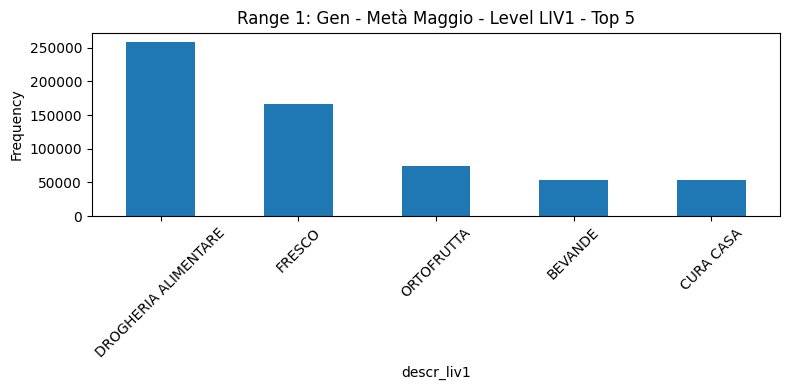

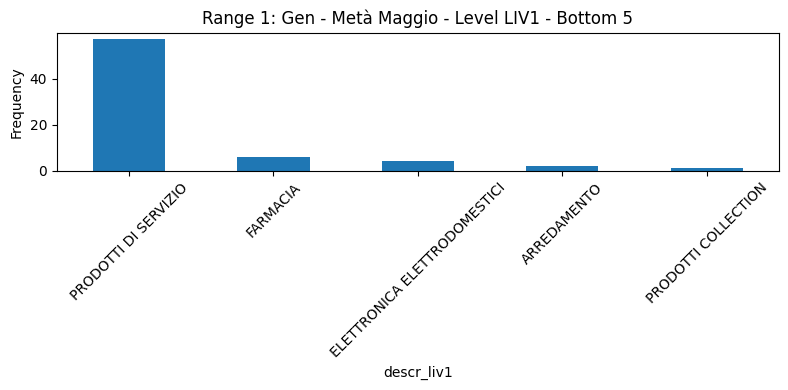

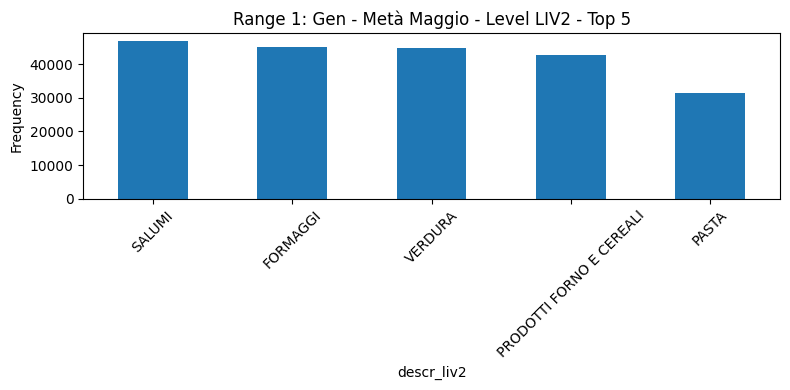

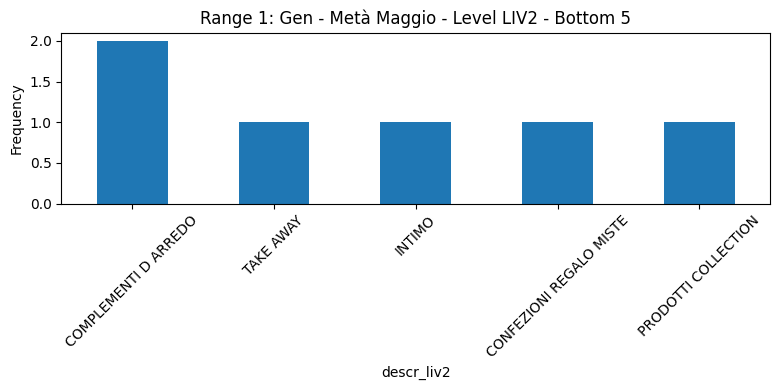

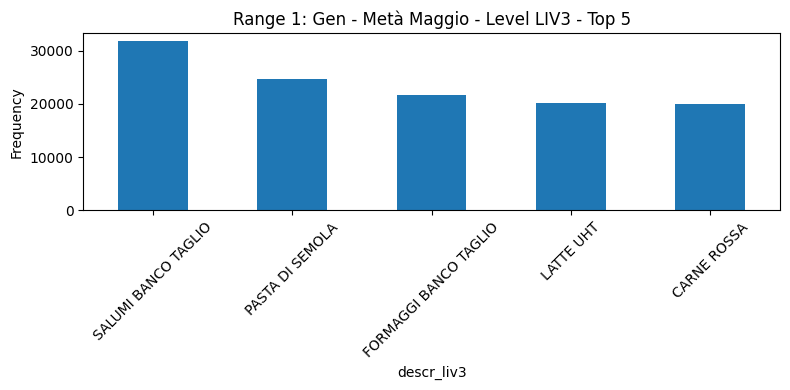

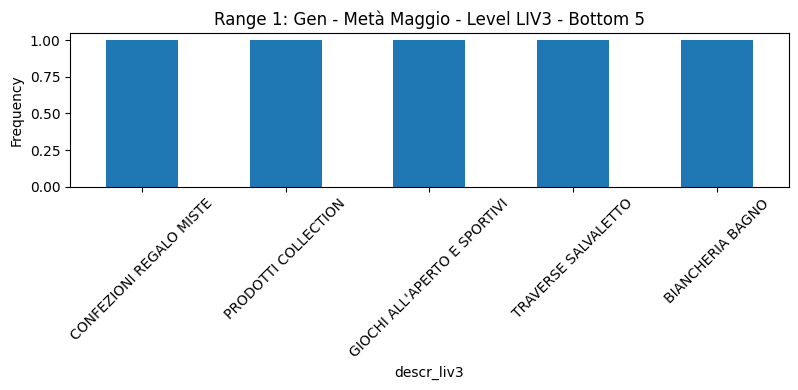

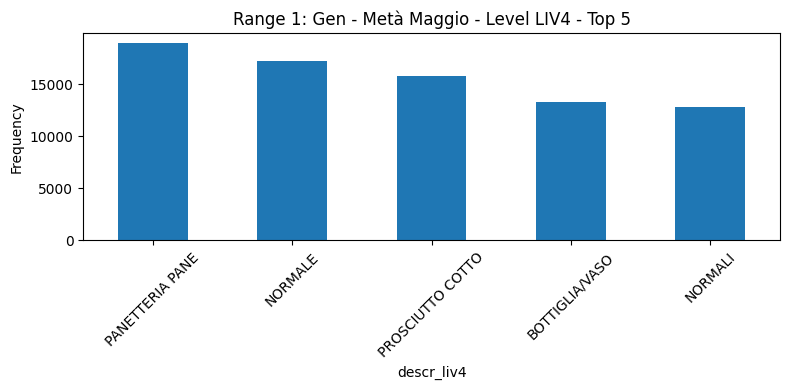

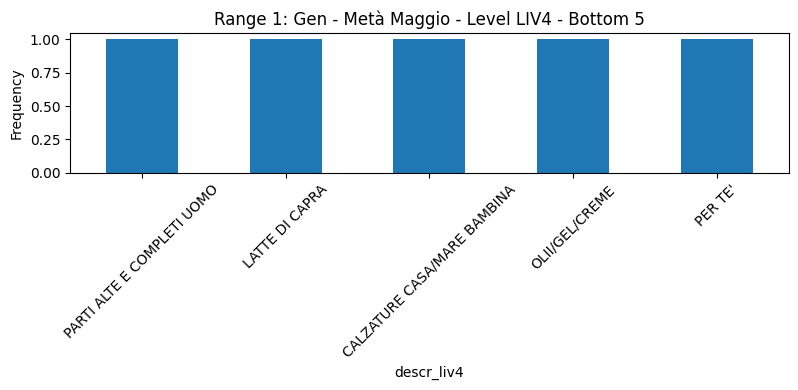

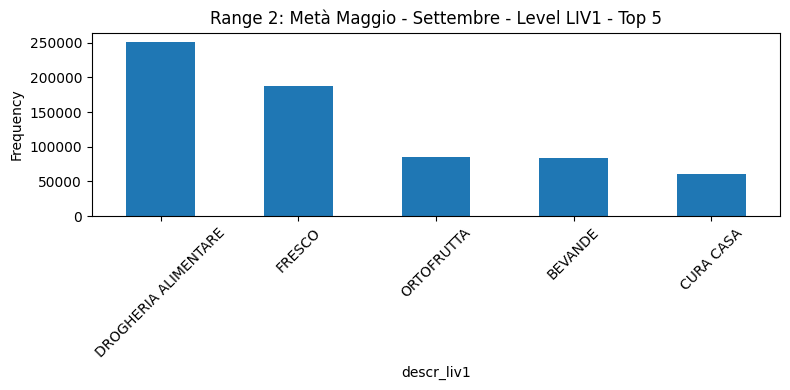

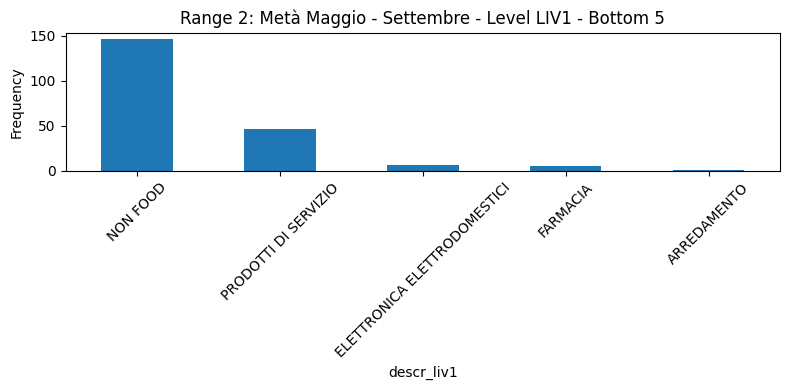

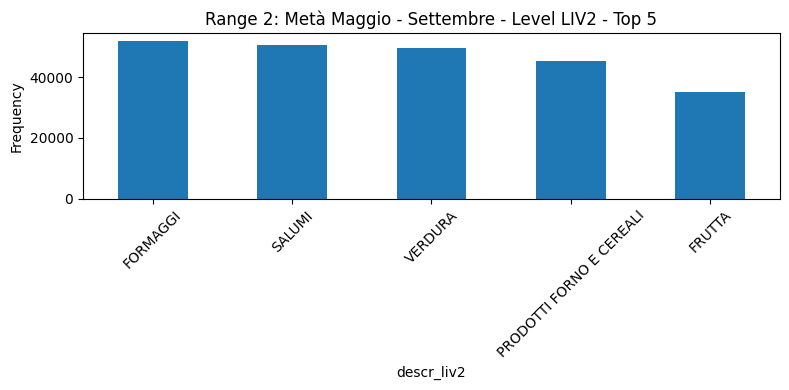

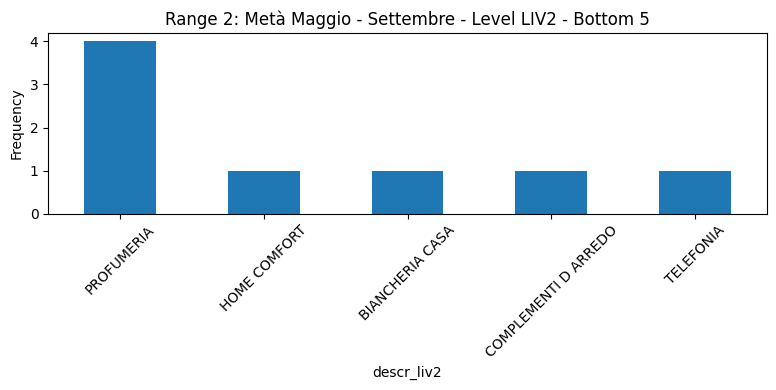

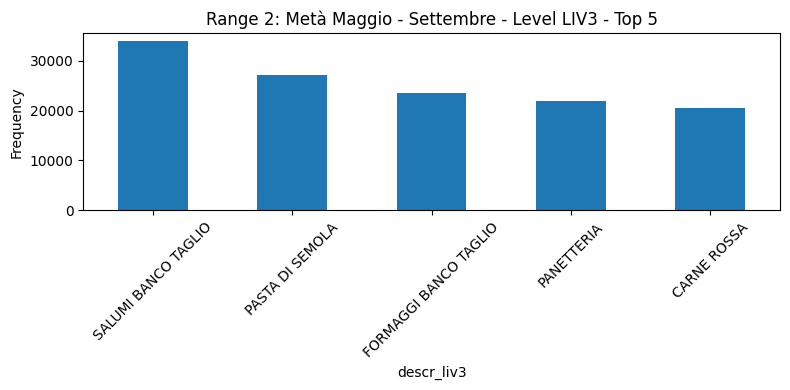

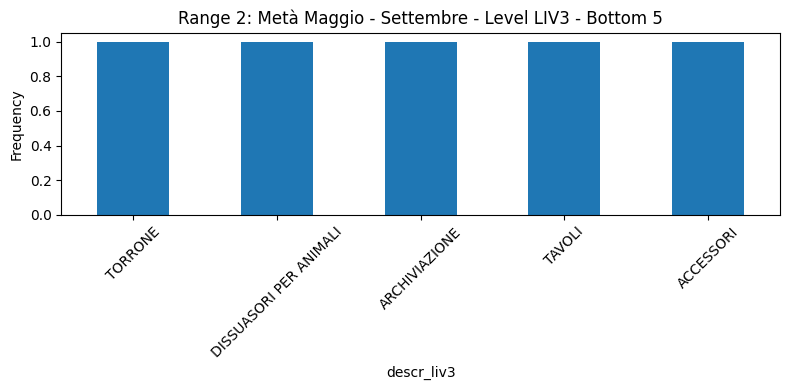

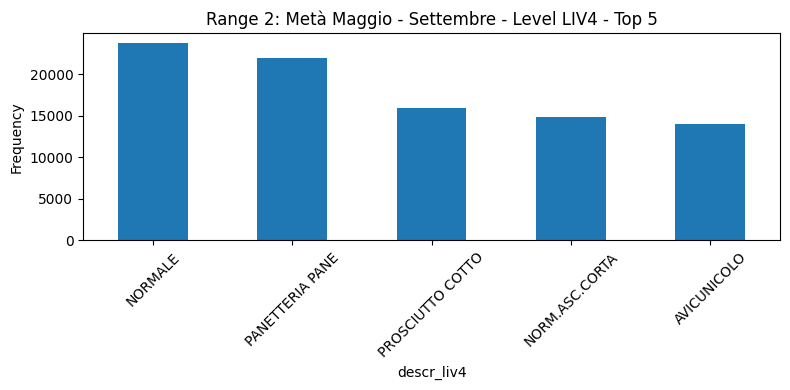

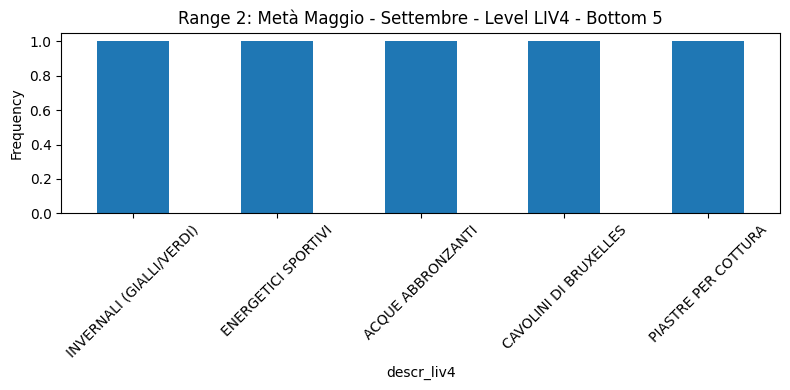

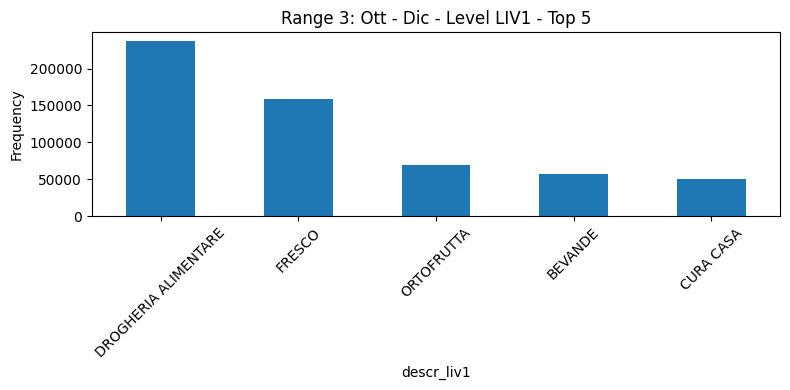

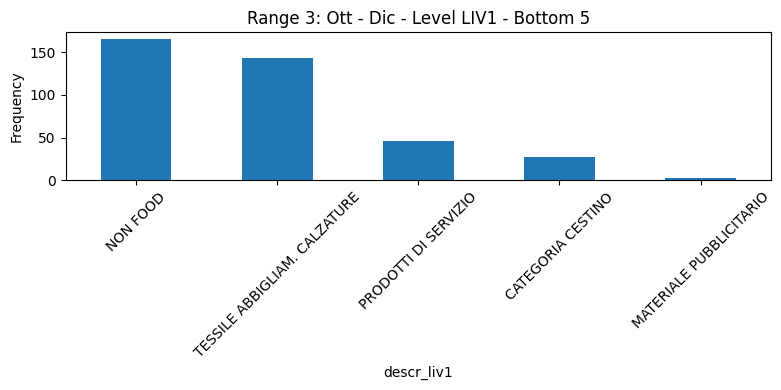

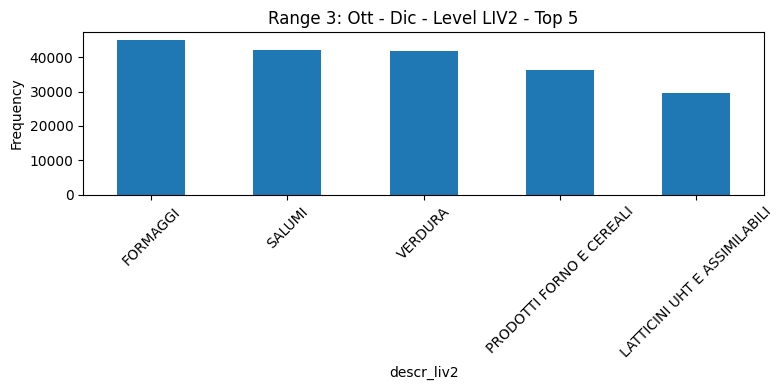

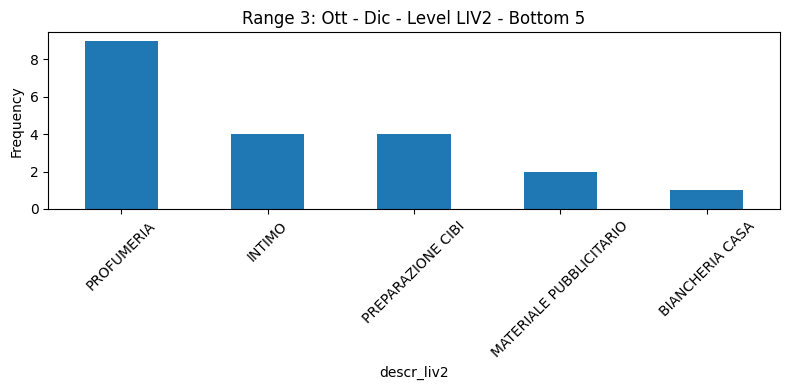

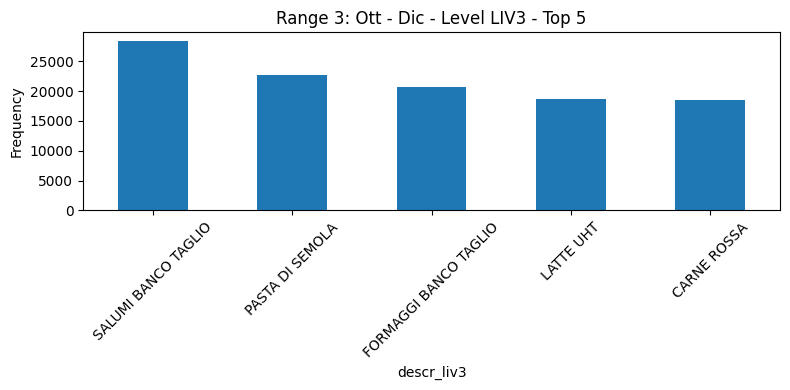

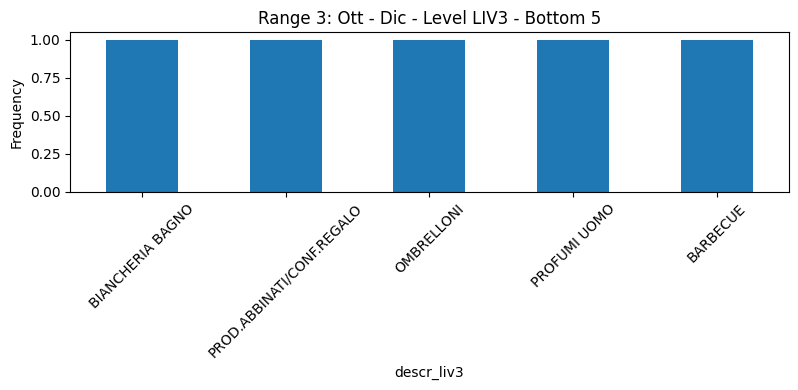

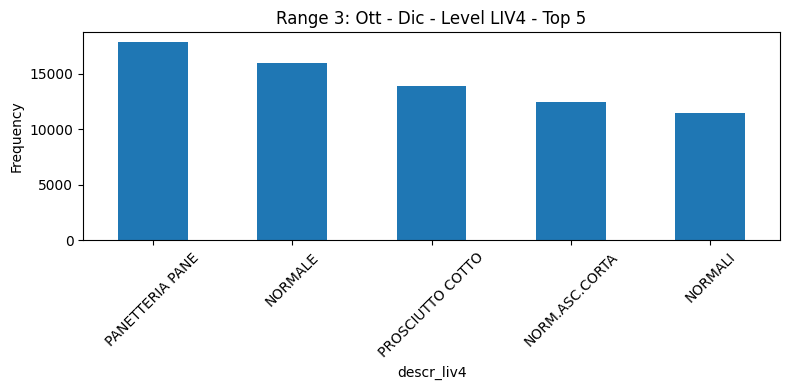

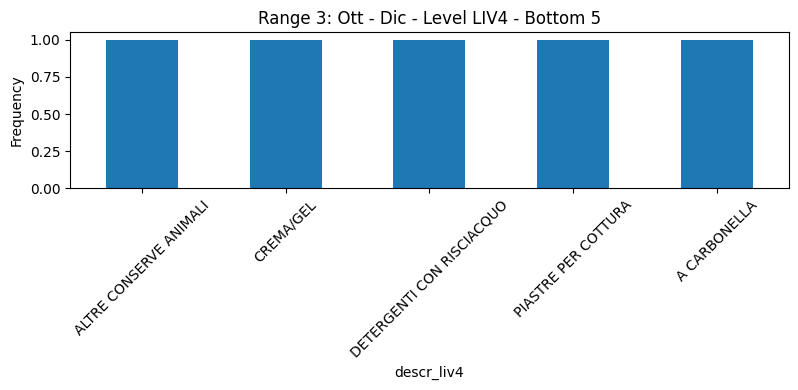

In [7]:
ranges = [
    (df_range1, "Range 1: Gen - Metà Maggio"),
    (df_range2, "Range 2: Metà Maggio - Settembre"),
    (df_range3, "Range 3: Ott - Dic")
]

for df_range, range_name in ranges:
    for level, desc_col in levels.items():
        plot_frequency(df_range, desc_col, f"{range_name} - Level {level.upper()}")
